# The Central Limit Theorem


**IMPORTANT INSTRUCTIONS:** This activity is designed for you to experiment with Python code about samplig, variance, and mean. Feel free to change any numerical value throughout the code in the activity to visualize different outcomes and results.

## The Central Limit Theorem

The central limit theorem (CLT) is a fundamental theorem of statistics that lays the foundations for understanding the results of *sampling*.


### Formal Definition

The central limit theorem (CLT) states that the distribution of a sample variable approximates a normal distribution as the *sample* size becomes larger, assuming that all *samples* are identical in size and regardless of the population's actual distribution shape.

In other words, according to the CLT, the mean of a *sample* of data will be closer to the mean of the overall population in question, as the *sample* size increases.

### Key Terms 

Imagine performing a *trial*  and getting an *observation*. Next, imagine repeating the *trial* again and getting a new independent *observation*. Collected together, multiple *observations* represent a *sample* of *observations*.

As you know, a sample is a group of *observations* from a broader *population*.

Let's first understand the differences between the words *observation*, *sample*, and *population*:

- *Observation*: is the result from one *trial* of an experiment.
- *Sample*: is the group of results gathered from separate independent *trials*.
- *Population*: Is the space of all possible observations that could be seen from a trial.

The mean of a *sample* won't be exactly the same mean of the *population* distribution: like any estimate, it will be wrong and will contain some error. However, if you draw multiple independent *samples* and calculate their means, the distribution of those means will form a Gaussian distribution.

### Key Takeaways

Without going too deep into the mathematical details of the CLT, here are some fundamental takeways from it:


- The CLT states that the distribution of *sample* means approximates a normal distribution as the sample size gets larger, regardless of the *population*'s distribution.
- Sample sizes equal to or greater than **30** are often considered sufficient for the CLT to hold.
- The average of the means and standard deviations of the *sample* will equal the mean and standard deviation of the *population*.


## Uniform Distribution

For this example, assume that you are rolling a fair six-faced die. 

As you already know, the distribution of the numbers that turn up from a die roll is uniform.

Assume that we roll the die 50 times.

Theoretically, the mean of the experiment is given by:

$$\mu_x = \frac{\sum X}{N} =\frac{1+2+3+4+5+6}{6} = 3.5$$

 In the code cell below, we use Python to generate the sample of 50 die rolls and the mean value of the sample.

In [13]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean

# seed the random number generator for reproducibility
seed(1)

# generate a sample of die rolls
rolls = randint(1, 7, 50)
print(rolls)
print(mean(rolls))


[6 4 5 1 2 4 6 1 1 2 5 6 5 2 3 5 6 3 5 4 5 3 5 6 3 5 2 2 1 6 2 2 6 2 2 1 5
 2 1 1 6 4 3 2 1 4 6 2 2 4]
3.44


You can see that the *sample* mean is not exactly the same as the theoretical one. 

Can you guess why? What happens to the *sample* mean if you increase the number of trials?

The sample mean gets closer to 3.5 the more trials there are. I increased the number of rolls to 500000 and got a mean of 3.50719. This is 1 order of magnitude closer to the theoretical 3.5 mean.


Next, repeat the processs multiple times. Repeating it 100 times, will give you a result of 100 sample means.

Run the code cell below:

In [63]:
# calculate the mean of 50 dice rolls 100 times
means = [mean(randint(1, 7, 50)) for i in range(100)]

Finally, we can use Matplotlib to the distribution of these sample means.

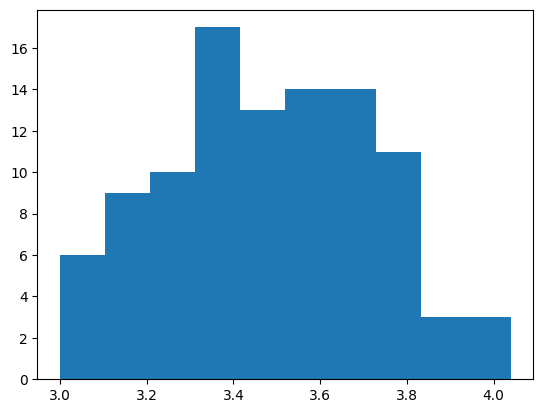

In [64]:
import matplotlib.pyplot as plt
# plot the distribution of sample means
plt.hist(means)
plt.show()

You will notice that the distribution doesn't really resemble a Gaussian.

How can you improve the result? What happens if you increase the number of *trials* even more?

If I increase the number of trials, it starts to look more like a Guassian distribution, aka normal distribution, aka bell curve.



The image below, displays the sample mean distribution when we repeat the experiment 10,000 times.

<img src="clt.png" alt="Drawing" style="width: 400px;"/>

You can see that as the number of experiments increases, the underlying distribution of the sample means resembles a Guassian, with the mean equal to 3.5, in accordance with the CLT.

## Exponential Distribution

As you know, the exponential distribution is a continuous distribution that is often used to model the expected time one needs to wait before the occurrence of an event.

As a reminder, the exponential distribution is defined as:

$$f(x) = \begin{cases} 
      \lambda e^{-\lambda x} \text{  if  } x >0 \\
      0 \text{  otherwise.}
   \end{cases}
$$

Additionally, the mean, $\mu_x$, and the standard deviation, $\sigma^2$, of an exponential disribution are given by:

$$\mu_x = \sigma^2 = \frac{1}{\lambda}.$$


Suppose you have a population which is exponentially distributed and defined by the parameter $\lambda = 0.25$. The mean and the standard deviation for this case are given by:

In [28]:
import numpy as np

# rate parameter for the exponentially distributed population

rate = 0.25


# population mean

mu = 1/rate


# population standard deviation

sd = np.sqrt(1/(rate**2))


print('Population mean:', mu)

print('Population standard deviation:', sd)

Population mean: 4.0
Population standard deviation: 4.0


Now determine what the sampling distribution looks like for this population. Consider two cases: one with a small *sample* size (n= 2), and one with a large *sample* size (n=500).

First, draw 50 random *samples* of two from the population. The code to do this in Python is given below:

In [29]:
import pandas as pd
import numpy as np

# drawing 50 random samples of size 2 from the exponentially distributed population
sample_size = 2
#generating an empty dataframe
df2 = pd.DataFrame(index= ['x1', 'x2'] )

#filling the dataframe with exponentially distributed points
for i in range(1, 51):
    exponential_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df2[col] = exponential_sample

df2

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,...,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
x1,1.478019,0.568052,0.389551,1.486427,0.410918,8.486899,4.194120,5.759850,0.178310,0.132241,...,1.619498,1.002494,6.757822,5.451052,10.736775,1.725228,10.445857,1.254074,4.776674,0.043892
x2,4.556669,0.243937,7.299416,5.641810,2.162502,6.412405,1.688285,13.011787,2.783647,3.557161,...,9.709612,1.785041,3.679410,1.876971,3.306469,5.899269,1.726184,12.638914,2.406020,2.579993


For each of the 50 *samples*, you can calculate the *sample* mean and plot its distribution using Seaborn as follows:

C:\Users\andre\AppData\Local\Temp\ipykernel_17896\603104995.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2_sample_means);


sample 1      3.017344
sample 2      0.405995
sample 3      3.844484
sample 4      3.564118
sample 5      1.286710
sample 6      7.449652
sample 7      2.941202
sample 8      9.385818
sample 9      1.480979
sample 10     1.844701
sample 11    12.012899
sample 12     4.721952
sample 13     1.401098
sample 14     0.762749
sample 15     2.700533
sample 16     1.967012
sample 17     5.068325
sample 18     8.288915
sample 19     2.600915
sample 20     3.017278
sample 21     1.652031
sample 22     6.644552
sample 23     2.280250
sample 24     4.539826
sample 25     4.422894
sample 26    10.182398
sample 27     4.602316
sample 28     2.017617
sample 29     7.009693
sample 30     5.886232
sample 31     5.723412
sample 32     1.944371
sample 33     3.088221
sample 34     4.901916
sample 35     5.020260
sample 36     5.053131
sample 37     9.030387
sample 38     4.974157
sample 39     6.512855
sample 40     1.306459
sample 41     5.664555
sample 42     1.393767
sample 43     5.218616
sample 44  

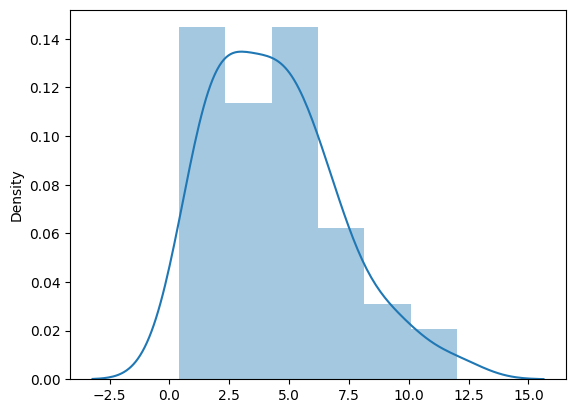

In [65]:
import seaborn as sns
# calculating sample means and plotting their distribution
df2_sample_means = df2.mean()
sns.distplot(df2_sample_means);
df2_sample_means

You can see that even for a small *sample* size such as two, the distribution of *sample* means looks like a poor approximation of a normal distribution, with some left skew. This is due to the fact that the *sample* size is too small (n=2) and this size is not large enough for the CLT to hold.


What happens if you try to repeat the above process, but with a much larger *sample* size?

In the code cell below, fill in the ellipsis to set the *sample* size equal to 500.

C:\Users\andre\AppData\Local\Temp\ipykernel_17896\790156254.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df500_sample_means);


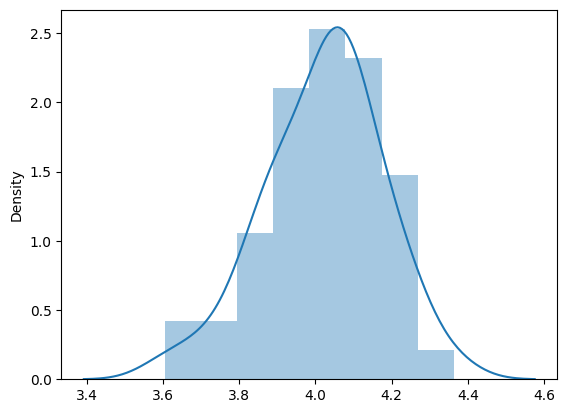

In [68]:
# drawing 50 random samples of size 500
sample_size=500

df500 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample

# print(df500)
df500_sample_means = pd.DataFrame(df500.mean(),columns=['Sample means'])
sns.distplot(df500_sample_means);

After running the experiment with a *sample* size equal to 500, you should see a distribution similar to the one below:

<img src="exp.png" alt="Drawing" style="width: 400px;"/>


You notice that the *sampling* distribution looks much more like a normal distribution now as you have used a much larger sample size (n=500). You can also see that the mean of the *sampling* distribution is close to the theoretical one that we computed above.